# Navigation

---

In this notebook we use the Unity ML-Agents environment
### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np
from matplotlib import pyplot as plt
import torch

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
from sys import platform
if platform == 'linux':
    bananFile = r'Banana_Linux/Banana.x86_64'
else:
    bananFile = r"Banana_Windows_x86\Banana.exe"
    
env = UnityEnvironment(file_name=bananFile)

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 4. Define the agent and training:

In [4]:
from dqn_agent import Agent

agent = Agent(state_size=37, action_size=4, seed=0, fc1_units=50, fc2_units=40)


In [5]:
agent.qnetwork_local.train()

QNetwork(
  (fc1): Linear(in_features=37, out_features=50, bias=True)
  (fc2): Linear(in_features=50, out_features=40, bias=True)
  (fc3): Linear(in_features=40, out_features=4, bias=True)
)

Episode 50	Eps 0.78	Average Score: 0.46
Episode 100	Eps 0.61	Average Score: 1.01
Episode 150	Eps 0.47	Average Score: 2.29
Episode 200	Eps 0.37	Average Score: 4.45
Episode 250	Eps 0.29	Average Score: 6.84
Episode 300	Eps 0.22	Average Score: 7.86
Episode 350	Eps 0.17	Average Score: 9.03
Episode 400	Eps 0.13	Average Score: 10.50
Episode 450	Eps 0.10	Average Score: 12.00
Episode 500	Eps 0.08	Average Score: 13.55
Episode 550	Eps 0.06	Average Score: 14.77
Episode 600	Eps 0.05	Average Score: 15.46
Episode 650	Eps 0.04	Average Score: 15.41
Episode 700	Eps 0.03	Average Score: 15.10
Episode 750	Eps 0.02	Average Score: 15.02
Episode 800	Eps 0.02	Average Score: 15.63


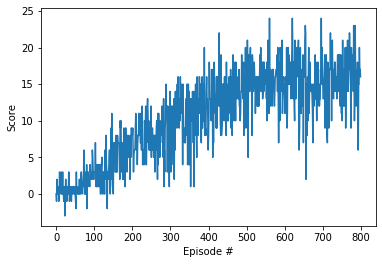

In [6]:
from collections import namedtuple, deque

#def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
def dqn(n_episodes=600, max_t=300, eps_start=1.0, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores = []                        # list containing scores from each episode
    scores_window = deque(maxlen=100)  # last 100 scores
    eps = eps_start                    # initialize epsilon
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]  # Roee
        #state = env.reset()  # Roee : added commented
        state = env_info.vector_observations[0]
        
        #     action = np.random.randint(action_size)        # select an action
        #     env_info = env.step(action)[brain_name]        # send the action to the environment
        #     next_state = env_info.vector_observations[0]   # get the next state
        #     reward = env_info.rewards[0]                   # get the reward
        #     done = env_info.local_done[0]                  # see if episode has finished
        #     score += reward                                # update the score
        #     state = next_state      
        
        score = 0
        for t in range(max_t):
            
            action = agent.act(state, eps)                
            env_info = env.step(action)[brain_name]
            
            
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            
        
            # next_state, reward, done, _ = env.step(action)
            if agent.qnetwork_local.training:  # ROEE
                agent.step(state, action, reward-0.01, next_state, done)  # ROEE

            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tEps {:.2f}\tAverage Score: {:.2f}'.format(i_episode, eps, np.mean(scores_window)), end="")
        if i_episode % 50 == 0:
            print('\rEpisode {}\tEps {:.2f}\tAverage Score: {:.2f}'.format(i_episode, eps, np.mean(scores_window)))
        if np.mean(scores_window)>=30.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
    return scores

scores = dqn(n_episodes=800)

# plot the scores
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

## Test 100 episodes:

Episode 50	Eps 0.01	Average Score: 15.90
Episode 100	Eps 0.01	Average Score: 15.75


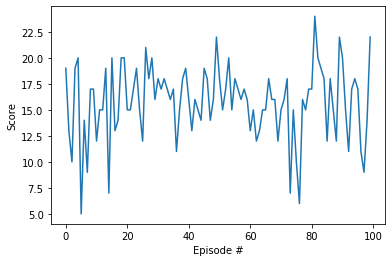

In [9]:
agent.qnetwork_local.eval()
agent.qnetwork_target.eval()
with torch.no_grad():
    scores = dqn(n_episodes=100, eps_start=0.01)
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(scores)), scores)
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

In [10]:
# agent.qnetwork_local.eval()
# agent.qnetwork_target.eval()
import torch
agent.qnetwork_local.training

False

# Save test and load 

### Make sure model is saved:

In [7]:
torch.save(agent.qnetwork_local.state_dict(), r'checkpoint600_37fc50fc40fc4.pth')

import pickle
memory = agent.memory.memory.copy()
with open('checkpoint600_37fc50fc40fc4_memory_pickelTest1.dat','wb') as outf:
    for mem in memory:
        for field in mem:
            pickle.dump(field, outf)

### Test model (visually):

In [13]:
import time
agent.qnetwork_local.eval()
agent.qnetwork_target.eval()
env_info = env.reset(train_mode=False)[brain_name]  # Roee
#state = env.reset()  # Roee : added commented
state = env_info.vector_observations[0]

score = 0
steps = 0
with torch.no_grad():
    while True:
        steps+=1
        action = agent.act(state, 0)
        env_info = env.step(action)[brain_name]
        next_state = env_info.vector_observations[0]   # get the next state
        reward = env_info.rewards[0]                   # get the reward
        done = env_info.local_done[0]                  # see if episode has finished
        state = next_state
        score += reward
        time.sleep(0.05)
        if reward==1:
            print("Yellow!")
        elif reward==-1:
            print("Blue...")
        if done:
            break

            
print('Number of steps = ' + str(steps))
print('Score = ' + str(score))

Blue...
Yellow!
Yellow!
Yellow!
Yellow!
Yellow!
Yellow!
Yellow!
Yellow!
Yellow!
Yellow!
Yellow!
Yellow!
Yellow!
Number of steps = 300
Score = 12.0


## Load previously trained agent (memory and network weights):

In [18]:
from dqn_agent import Agent

agent = Agent(state_size=37, action_size=4, seed=0, fc1_units=50, fc2_units=40)


import pickle
buffSize = int(1e5)

with open('checkpoint600_37fc50fc40fc4_memory_pickelTest1.dat','rb') as inpf:
    for i in range(buffSize):
        state, action, reward, next_state, done = (pickle.load(inpf), pickle.load(inpf), pickle.load(inpf), pickle.load(inpf), pickle.load(inpf))
        agent.memory.add(state, action, reward, next_state, done)
        
import torch
state_dict = torch.load('checkpoint600_37fc50fc40fc4.pth')
agent.qnetwork_local.load_state_dict(state_dict)
agent.qnetwork_target.load_state_dict(state_dict)

In [14]:
env.close()